In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import tensorflow as tf
from sklearn.model_selection import train_test_split
from random import random
from keras.utils.np_utils import to_categorical

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

(<AxesSubplot: ylabel='Frequency'>,)

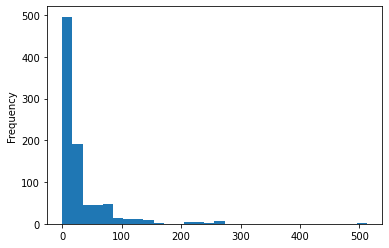

In [3]:
train_data.Fare.plot(kind = "hist",bins = 30) , 

<AxesSubplot: >

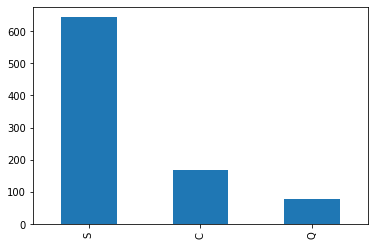

In [4]:
train_data.Embarked.value_counts().plot(kind = "bar")

<AxesSubplot: >

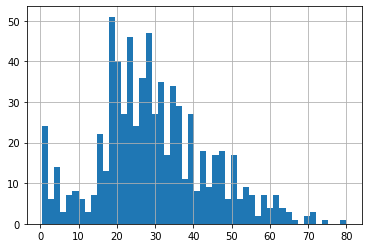

In [5]:

train_data.Age.hist(bins = 50)

In [6]:
output_data = train_data["Survived"] #891
input_data = train_data.drop(columns = ["Name","Ticket", "Cabin","PassengerId"], axis = 1 )
input_data.dropna(how="any",axis = 0, inplace = True) # 712
output_data = input_data["Survived"] #712
dummy = pd.get_dummies(input_data["Sex"])
input_data = pd.concat((input_data,dummy), axis = 1)

input_data2 = input_data.copy()


embarked = input_data['Embarked'].replace("S",0).replace("Q",1).replace("C",2);
Pclass = input_data['Pclass'].replace(1,0).replace(2,1).replace(3,2)

a = tf.keras.utils.to_categorical(np.asarray(embarked), num_classes=len(input_data['Embarked'].unique()))
b = tf.keras.utils.to_categorical(np.asarray(Pclass), num_classes=len(input_data['Pclass'].unique()))
c = tf.keras.utils.to_categorical(np.asarray(input_data2['SibSp']), num_classes = len(input_data['SibSp'].unique()))
d = tf.keras.utils.to_categorical(np.asarray(input_data2['Parch']), num_classes = len(input_data['Parch'].unique()))

for i in range(len(input_data['Embarked'].unique())):
     input_data2[f"{i}"] = a[:,i]
for i in range(len(input_data['Pclass'].unique())):
    input_data2[f"{i+len(input_data['Embarked'].unique())}"] = b[:,i]
for i in range(len(input_data['SibSp'].unique())):
    input_data2[f"{i+len(input_data['Embarked'].unique())  +len(input_data['Pclass'].unique())}"] = c[:,i]
for i in range(len(input_data['Parch'].unique())):
    input_data2[f"{i+len(input_data['Embarked'].unique()) + len(input_data['SibSp'].unique()) +len(input_data['Pclass'].unique())}"] = d[:,i] 



input_data2.drop(columns=["female","Sex","Embarked","Survived"],axis = 1, inplace = True)

input_data2.drop(["Pclass"],axis = 1,inplace = True)
input_data2.drop(["SibSp"],axis = 1,inplace = True)
input_data2.drop(["Parch"],axis = 1,inplace = True)
input_data2["Fare"] = input_data["Fare"]/512.3292
input_data2["Age"] = input_data["Age"]/80.0

x_train, x_test,y_train, y_test = train_test_split(input_data2,output_data,test_size=0.2)

x_array = np.asarray(x_train)
y_array = np.asarray(y_train)
x_array_test = np.asarray(x_test)
y_array_test =  np.asarray(y_test)


np.unique(y_array_test, return_counts = True)

(array([0, 1], dtype=int64), array([87, 56], dtype=int64))

In [7]:
input_data2

,Age,Fare,male,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,18
0,0.2750,0.014151,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.4750,0.139136,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.3250,0.015469,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4375,0.103644,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4375,0.015713,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0.4875,0.056848,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
886,0.3375,0.025374,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
887,0.2375,0.058556,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
889,0.3250,0.058556,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def threshold(threshold,data):
    final = []
    for i in data:
        if i> threshold :
            final.append(1)

        else :
            final.append(0)
    return final

In [9]:
model2 = tf.keras.Sequential([
        tf.keras.layers.Dense(16,input_dim = 22,activation = "relu"),
        tf.keras.layers.Dense(32,activation = "relu"),
        tf.keras.layers.Dense(64,activation = "relu"),
        tf.keras.layers.Dense(64,activation = "relu"),
        tf.keras.layers.Dense(32,activation = "relu"),
        tf.keras.layers.Dense(1,activation = "sigmoid")
    ])
#compile model
#optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1)
model2.compile(optimizer = "adam",loss ="binary_crossentropy",metrics = ["accuracy"])

#train model
model2.fit(x_array,y_array,epochs = 150,batch_size = 32)
NN_predict = model2.predict(x_array_test)
####Model Evaluation####
print(f"model evaluation {model2.evaluate(x_array_test,y_array_test,verbose = 1,batch_size=20)}")
#tf.keras.models.save_model(model2, "model-titanic-NN.h5")

Epoch 1/150
18/18 [==============================] - 1s 1ms/step - loss: 0.6823 - accuracy: 0.5835
Epoch 2/150
18/18 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.7083
Epoch 3/150
18/18 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.7504
Epoch 4/150
18/18 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.7821
Epoch 5/150
18/18 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7786
Epoch 6/150
18/18 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.7909
Epoch 7/150
18/18 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.7979
Epoch 8/150
18/18 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8120
Epoch 9/150
18/18 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.7996
Epoch 10/150
18/18 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8067
Epoch 11/

18/18 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8506
Epoch 84/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8489
Epoch 85/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8524
Epoch 86/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8436
Epoch 87/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8576
Epoch 88/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8612
Epoch 89/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8471
Epoch 90/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8436
Epoch 91/150
18/18 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8576
Epoch 92/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3264 - accuracy: 0.8524
Epoch 93/150


In [10]:
thershholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,]
for i in thershholds:
    print(f"{i} = {accuracy_score(y_array_test,np.array(threshold(i,NN_predict)))}")

0.1 = 0.5944055944055944
0.2 = 0.7132867132867133
0.3 = 0.7762237762237763
0.4 = 0.7692307692307693
0.5 = 0.8111888111888111
0.6 = 0.8111888111888111
0.7 = 0.7972027972027972
0.8 = 0.8041958041958042
0.9 = 0.8041958041958042


In [11]:
####Metrics###
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

y_pred = model2.predict(x_test)
auc_roc = roc_auc_score(y_test, y_pred)
y_pred_classes = (y_pred > 0.5).astype('int32')
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
print(f"f1 = {f1} , recall = {recall} , percision = {precision} , auc_roc  = {auc_roc }" )

5/5 [==============================] - 0s 746us/step
f1 = 0.7522935779816513 , recall = 0.7321428571428571 , percision = 0.7735849056603774 , auc_roc  = 0.7985426929392445


([<matplotlib.lines.Line2D at 0x1fabfa531c0>], 0.7985426929392445)

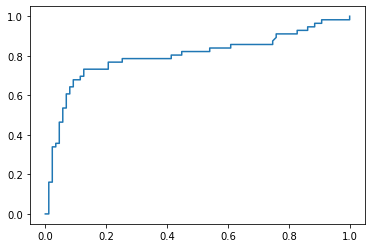

In [12]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import roc_curve
fpr, tpr, thr = sklearn.metrics.roc_curve(y_array_test, NN_predict)
plt.plot(fpr, tpr) , sklearn.metrics.auc(fpr, tpr)

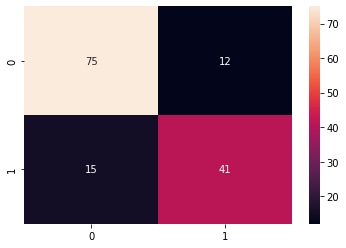

In [13]:
######Confusion matirx######
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm  = confusion_matrix(y_array_test, threshold(0.5,NN_predict))
f = sns.heatmap(cm, annot=True, fmt='d')

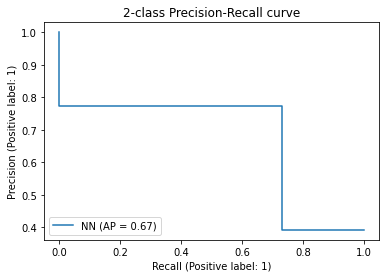

In [14]:
####PrecisionRecall curve###
##Precision = True Positives / (True Positives + False Positives)
#Recall = True Positives / (True Positives + False Negatives)
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(
    y_array_test
    ,threshold(0.5,NN_predict), name="NN"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")